In [1]:
#pip install yfinance

In [2]:
import yfinance as yf
from datetime import datetime

In [3]:
end = datetime.now()
start = datetime(year = end.year-20,month = 1,day = end.day)
stock = "GOOG"
stock_data = yf.download(stock,start,end)

C:\Users\Anshit\AppData\Local\Temp\ipykernel_14084\843523676.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(stock,start,end)
[*********************100%***********************]  1 of 1 completed


In [4]:
stock_data.head

<bound method NDFrame.head of Price            Close        High         Low        Open      Volume
Ticker            GOOG        GOOG        GOOG        GOOG        GOOG
Date                                                                  
2005-01-28    4.712718    4.820669    4.613680    4.704794   490158373
2005-01-31    4.843448    4.861769    4.746886    4.795662   385306832
2005-02-01    4.751342    4.869197    4.719898    4.812745   756384528
2005-02-02    5.099460    5.367852    5.042513    5.336904  1316889593
2005-02-03    5.220782    5.282929    5.095746    5.100204   521471303
...                ...         ...         ...         ...         ...
2025-06-23  166.009995  168.479996  163.330002  167.320007    36975600
2025-06-24  167.740005  169.250000  166.910004  167.684998    27310300
2025-06-25  171.490005  173.360001  168.561005  168.649994    23627400
2025-06-26  174.429993  174.649994  170.860001  173.384995    25909100
2025-06-27  178.270004  178.839996  172.710007 

In [5]:
stock_data.shape

(5136, 5)

In [6]:
stock_data.describe

<bound method NDFrame.describe of Price            Close        High         Low        Open      Volume
Ticker            GOOG        GOOG        GOOG        GOOG        GOOG
Date                                                                  
2005-01-28    4.712718    4.820669    4.613680    4.704794   490158373
2005-01-31    4.843448    4.861769    4.746886    4.795662   385306832
2005-02-01    4.751342    4.869197    4.719898    4.812745   756384528
2005-02-02    5.099460    5.367852    5.042513    5.336904  1316889593
2005-02-03    5.220782    5.282929    5.095746    5.100204   521471303
...                ...         ...         ...         ...         ...
2025-06-23  166.009995  168.479996  163.330002  167.320007    36975600
2025-06-24  167.740005  169.250000  166.910004  167.684998    27310300
2025-06-25  171.490005  173.360001  168.561005  168.649994    23627400
2025-06-26  174.429993  174.649994  170.860001  173.384995    25909100
2025-06-27  178.270004  178.839996  172.710

In [7]:
stock_data.isnull().sum()

Price   Ticker
Close   GOOG      0
High    GOOG      0
Low     GOOG      0
Open    GOOG      0
Volume  GOOG      0
dtype: int64

In [8]:
import matplotlib.pyplot as plt
def plot_graph(figsize,values,column):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("Years")
    plt.ylabel(column)


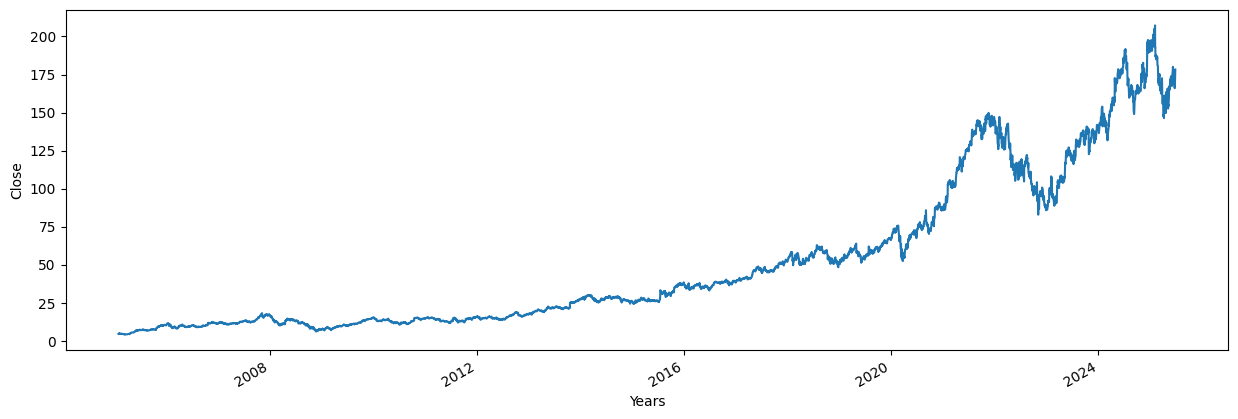

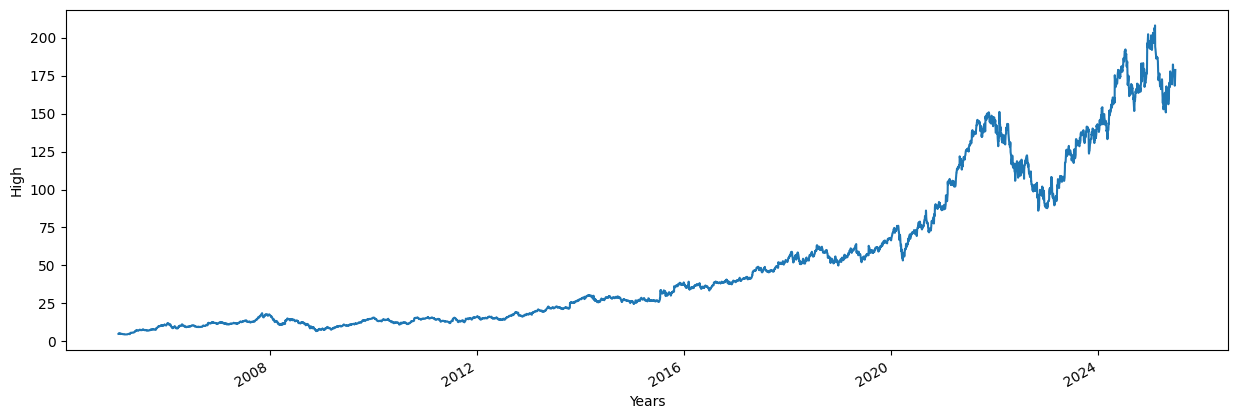

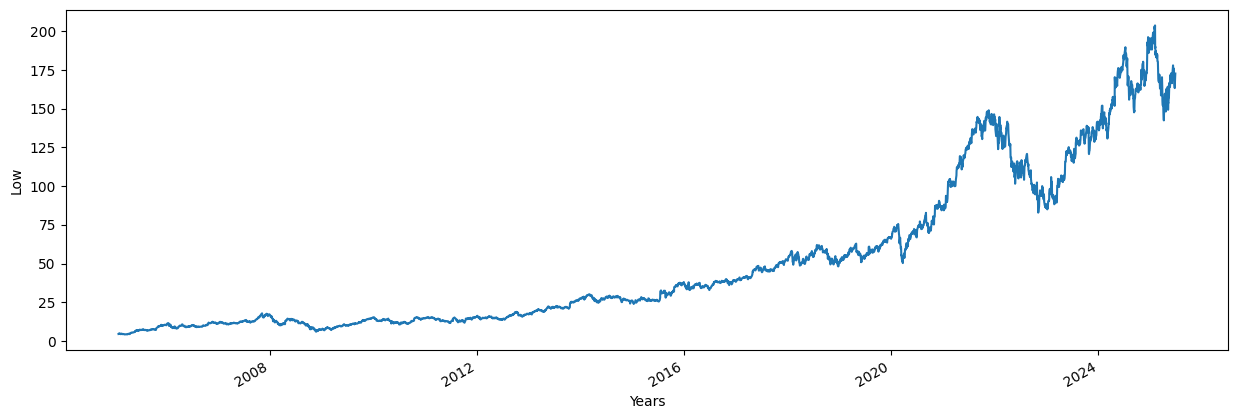

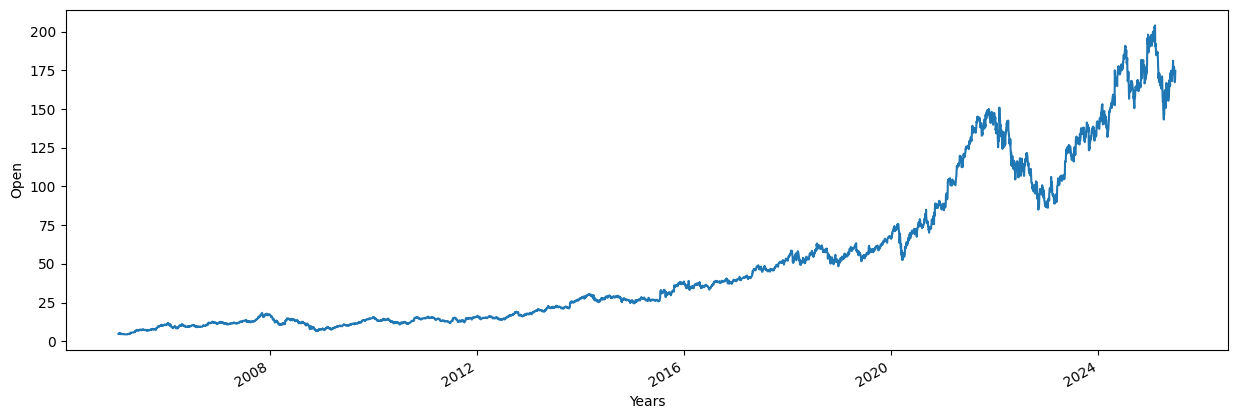

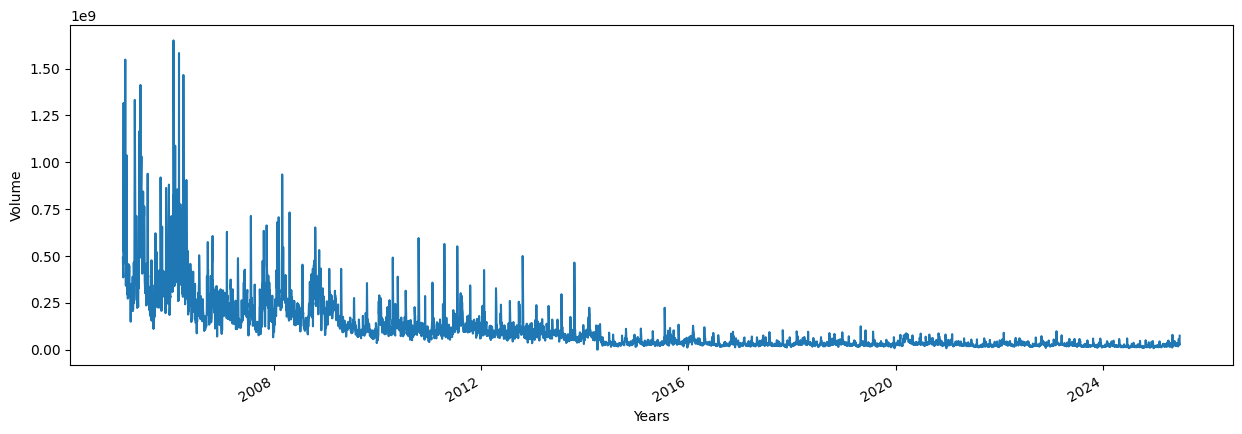

In [9]:
for i in stock_data.columns:
    plot_graph((15,5),stock_data[i],i[0])

In [10]:
#seeing average no. of days each year
for i in range(start.year,end.year):
    print(i,list(stock_data.index.year).count(i))

2005 234
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 252


In [11]:
stock_data.columns

MultiIndex([( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])

In [12]:
#seeing it is almost 250 lets calculate moving average of Close
import pandas as pd
stock_data['MA for 250 days'] = stock_data['Close'].rolling(250).mean()
stock_data['MA for 250 days'].isnull().sum()

np.int64(249)

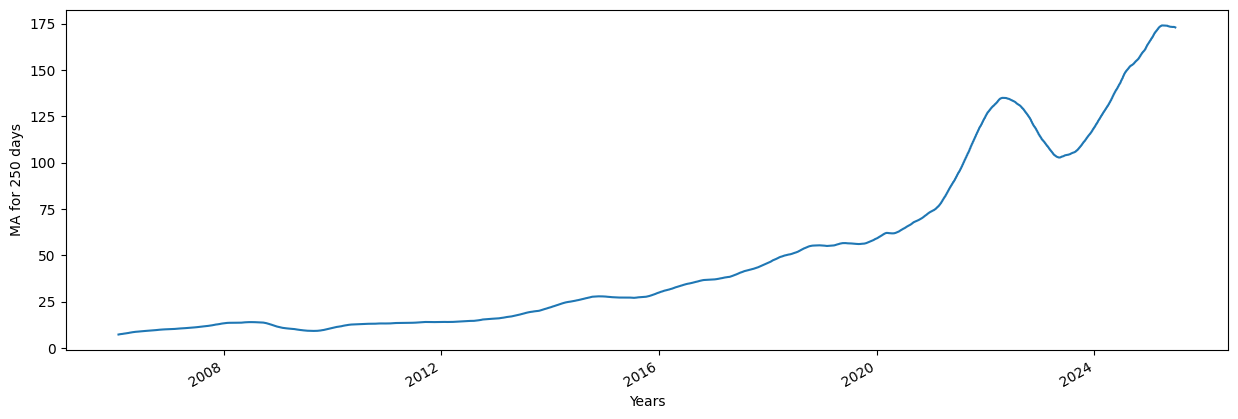

In [13]:
plot_graph((15,5),stock_data['MA for 250 days'],"MA for 250 days")

In [14]:
stock_data['MA for 100 days'] = stock_data['Close'].rolling(100).mean()
stock_data['MA for 100 days']

Date
2005-01-28           NaN
2005-01-31           NaN
2005-02-01           NaN
2005-02-02           NaN
2005-02-03           NaN
                 ...    
2025-06-23    170.083630
2025-06-24    169.793839
2025-06-25    169.487175
2025-06-26    169.180280
2025-06-27    168.941316
Name: MA for 100 days, Length: 5136, dtype: float64

<Figure size 640x480 with 0 Axes>

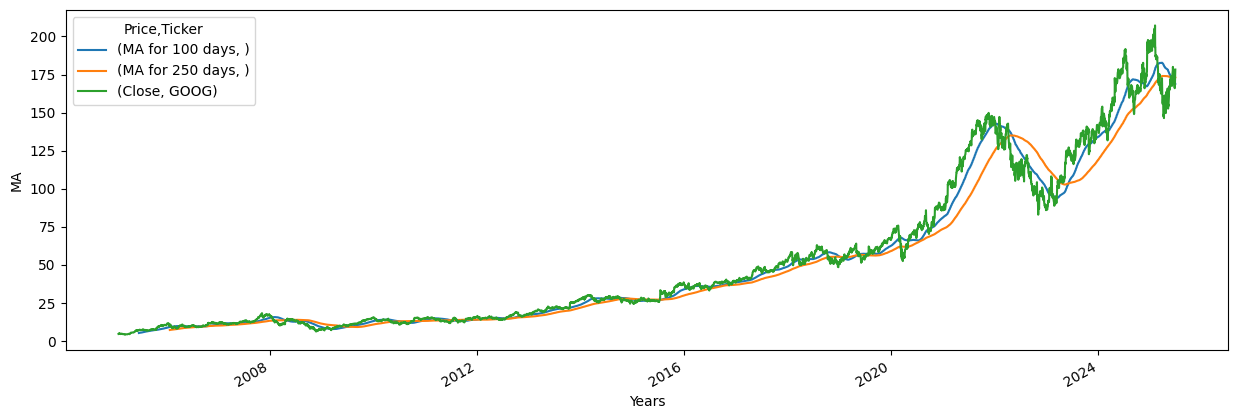

In [15]:
plot_graph((15,5),stock_data[['MA for 100 days','MA for 250 days','Close']],'MA')

In [16]:
stock_data["Percentage Change"] = stock_data['Close'].pct_change()
stock_data.head()

Price,Close,High,Low,Open,Volume,MA for 250 days,MA for 100 days,Percentage Change
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,,,
Date,,,,,,,,
2005-01-28,4.712718,4.820669,4.613680,4.704794,490158373,NaN,NaN,NaN
2005-01-31,4.843448,4.861769,4.746886,4.795662,385306832,NaN,NaN,0.027740
2005-02-01,4.751342,4.869197,4.719898,4.812745,756384528,NaN,NaN,-0.019017
2005-02-02,5.099460,5.367852,5.042513,5.336904,1316889593,NaN,NaN,0.073267
2005-02-03,5.220782,5.282929,5.095746,5.100204,521471303,NaN,NaN,0.023791


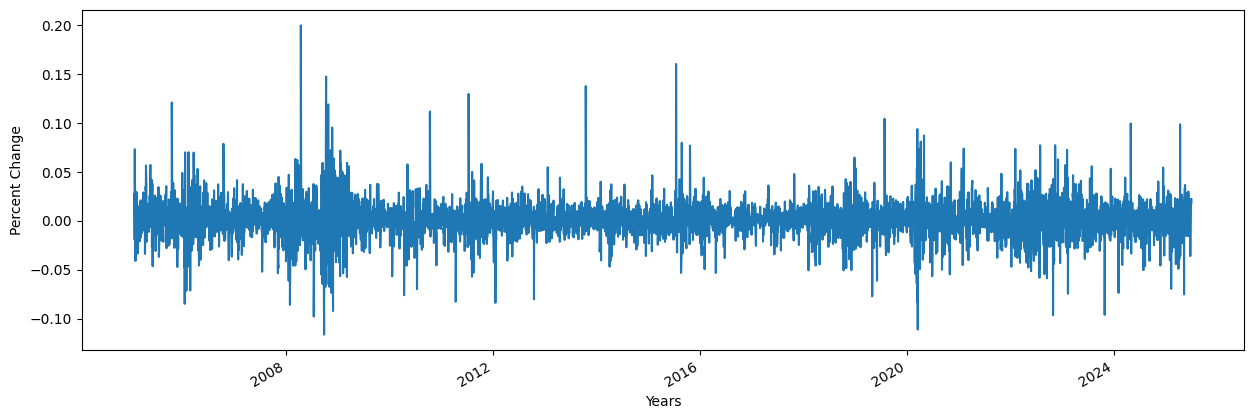

In [17]:
plot_graph((15,5),stock_data["Percentage Change"],"Percent Change")

In [18]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = Scaler.fit_transform(stock_data['Close'])
print(scaled_data)

[[0.0018732 ]
 [0.00251754]
 [0.00206357]
 ...
 [0.82387397]
 [0.83836438]
 [0.85729078]]


In [19]:
x_data = []
y_data = []
for i in range(100,len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
import numpy as np
x_data = np.array(x_data)
y_data = np.array(y_data)

In [20]:
x_data[0],y_data[0]

(array([[1.87320123e-03],
        [2.51753528e-03],
        [2.06357004e-03],
        [3.77935231e-03],
        [4.37731451e-03],
        [3.58410213e-03],
        [2.56756641e-03],
        [2.88607534e-03],
        [2.02452141e-03],
        [1.58520499e-03],
        [1.51442392e-03],
        [2.19658919e-03],
        [2.46993897e-03],
        [2.85800452e-03],
        [2.79577349e-03],
        [2.80187226e-03],
        [1.99889480e-03],
        [2.31374212e-03],
        [1.69625444e-03],
        [1.32771438e-03],
        [1.58642239e-03],
        [1.35089913e-03],
        [1.24350895e-03],
        [1.46682760e-03],
        [1.33137364e-03],
        [1.68648934e-03],
        [1.24595081e-03],
        [7.76126394e-04],
        [6.08942341e-04],
        [3.42908743e-04],
        [0.00000000e+00],
        [4.41755938e-04],
        [7.44403351e-05],
        [5.24736912e-04],
        [6.16260874e-04],
        [7.18772036e-04],
        [4.40536183e-04],
        [4.86908042e-04],
        [5.1

In [21]:
splitting_len = int(len(x_data)*0.7)
X_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]
X_test  = x_data[splitting_len:]
y_test = y_data[splitting_len:]


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1))

c:\Users\Anshit\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - loss: 0.0013
Epoch 2/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - loss: 1.1321e-04
Epoch 3/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 13s 121ms/step - loss: 1.0373e-04
Epoch 4/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 12s 105ms/step - loss: 8.7610e-05
Epoch 5/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - loss: 9.1548e-05
Epoch 6/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - loss: 8.6625e-05
Epoch 7/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - loss: 1.1702e-04
Epoch 8/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - loss: 1.1952e-04
Epoch 9/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - loss: 6.4702e-05
Epoch 10/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - loss: 6.6683e-05
Epoch 11/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - loss: 9.7723e-05
Epoch 12/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - loss: 7.4599e-05
Epoch 13/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - loss: 7.1424e-05
Epoch 14/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step


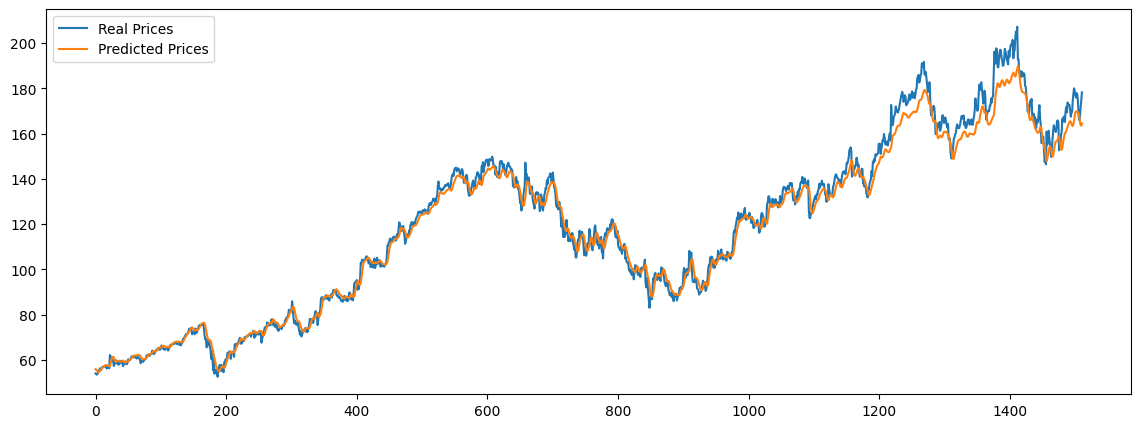

MSE: 22.169242020290827


In [24]:
from sklearn.metrics import mean_squared_error
predicted = model.predict(X_test)
predicted_prices = Scaler.inverse_transform(predicted)
real_prices = Scaler.inverse_transform(y_test)

# Plot the results
plt.figure(figsize=(14,5))
plt.plot(real_prices, label='Real Prices')
plt.plot(predicted_prices, label='Predicted Prices')
plt.legend()
plt.show()

# Evaluate
mse = mean_squared_error(real_prices, predicted_prices)
print("MSE:", mse)